## Calibration of lab probes ANK1 ANK2 P

Probes ANK1 and ANK2 are fixed under the canyons to measure conductivity at the heads of the canyons.

Probe P is used in the profiler.

We used a maximum salinity of (200 g salt/ 4 l water) which is a density of 1.03266 g/cm^3. 


Channel order: CH1 - ANK1, CH2 - ANK2, CH3 - probe P

I ran this calibration in situ for ANK1, ANK2

In [2]:
import os
import glob
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from numpy.polynomial import polynomial as P
import pandas as pd
import seaborn as sns
import scipy.io as sio
import warnings
warnings.filterwarnings("ignore")

In [3]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [1]:
df = pd.read_csv('../calibration_29mar19/calibration.csv',header=2)
print(df)


NameError: name 'pd' is not defined

../calibration_29mar19/calib_29mar19_100pc.mat
../calibration_29mar19/calib_29mar19_090pc.mat
../calibration_29mar19/calib_29mar19_080pc.mat
../calibration_29mar19/calib_29mar19_070pc.mat
../calibration_29mar19/calib_29mar19_060pc.mat
../calibration_29mar19/calib_29mar19_050pc.mat
../calibration_29mar19/calib_29mar19_040pc.mat
../calibration_29mar19/calib_29mar19_030pc.mat
../calibration_29mar19/calib_29mar19_020pc.mat
../calibration_29mar19/calib_29mar19_010pc.mat
../calibration_29mar19/calib_29mar19_000pc.mat


Text(0.5,1,'CH3 - P ')

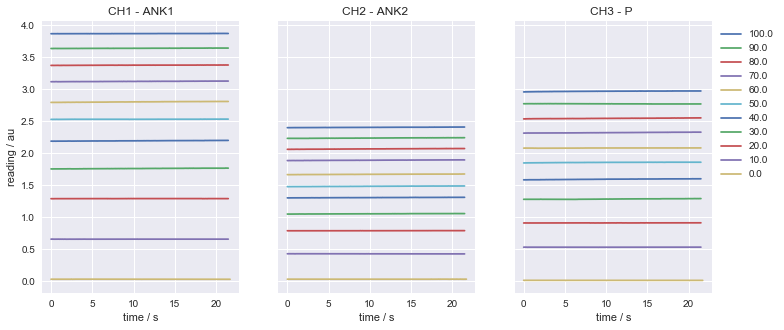

In [5]:
file_num = 11

mean_read_ch1 = np.zeros(file_num)
std_read_ch1 = np.zeros(file_num)

mean_read_ch2 = np.zeros(file_num)
std_read_ch2 = np.zeros(file_num)

mean_read_ch3 = np.zeros(file_num)
std_read_ch3 = np.zeros(file_num)

nums = ['100','090','080','070','060','050','040','030','020','010','000']
 
fig, (ax0, ax1, ax2) = plt.subplots(1,3, figsize=(12,5), sharey=True)

for num, ii in zip(nums, range(file_num)):
    filepath = '../calibration_29mar19/calib_29mar19_%spc.mat' %num
    print(filepath)
    mat = sio.loadmat(filepath, squeeze_me=True)
    ch1 = mat['ch1']
    ch2 = mat['ch2']
    ch3 = mat['ch3']
    time = mat['time']
    nsamples = mat['nSamples']
    
    mean_read_ch1[ii] = np.mean(ch1)
    std_read_ch1[ii] = np.std(ch1)
    
    mean_read_ch2[ii] = np.mean(ch2)
    std_read_ch2[ii] = np.std(ch2)
    
    mean_read_ch3[ii] = np.mean(ch3)
    std_read_ch3[ii] = np.std(ch3)
    
    ax0.plot(time,ch1)
    ax1.plot(time,ch2)
    ax2.plot(time,ch3, label='%1.1f' %df.percentage[ii])
    
ax2.legend(bbox_to_anchor=(1,1))
ax0.set_ylabel('reading / au')
ax0.set_xlabel('time / s')
ax1.set_xlabel('time / s')
ax2.set_xlabel('time / s')
ax0.set_title('CH1 - ANK1')
ax1.set_title('CH2 - ANK2 ')
ax2.set_title('CH3 - P ')

ANK1
rho_1 = 0.997387+0.004844r+0.000312r^2+0.000204r^3 

ANK2
rho_2 = 0.997311+0.006653r+0.003429r^2+-0.000041r^3 

Probe P
rho_P = 0.997378+0.006040r+0.001648r^2+0.000105r^3


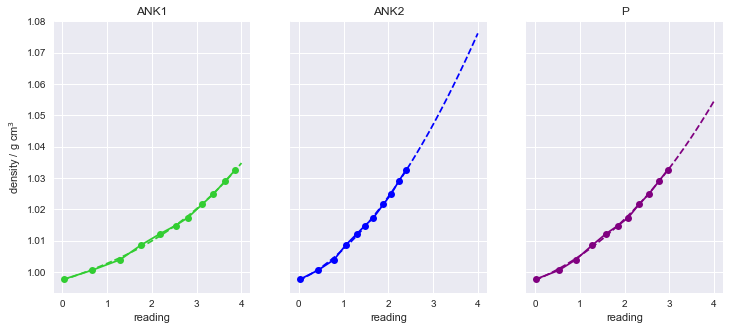

In [6]:
coef1, stats1 = P.polyfit(mean_read_ch1[:],np.array(df.density)[:],3,full=True)
coef2, stats2 = P.polyfit(mean_read_ch2[:],np.array(df.density)[:],3,full=True)
coefP, statsP = P.polyfit(mean_read_ch3[:],np.array(df.density)[:],3,full=True)

read_dummy = np.linspace(0,4,30)

fit1 = coef1[0]+(coef1[1]*read_dummy)+(coef1[2]*read_dummy**2) + (coef1[3]*read_dummy**3)
fit2 = coef2[0]+(coef2[1]*read_dummy)+(coef2[2]*read_dummy**2) + (coef2[3]*read_dummy**3)
fitP = coefP[0]+(coefP[1]*read_dummy)+(coefP[2]*read_dummy**2) + (coefP[3]*read_dummy**3)

fig, (ax0, ax1, ax2) = plt.subplots(1,3, figsize=(12,5), sharey=True)

ax0.errorbar(mean_read_ch1,df.density, xerr=std_read_ch1, marker='o', color='limegreen')
ax0.plot(read_dummy, fit1, '--',color='limegreen')

ax1.errorbar(mean_read_ch2,df.density, xerr=std_read_ch2, marker='o', color='blue')
ax1.plot(read_dummy, fit2, '--',color='blue')

ax2.errorbar(mean_read_ch3,df.density, xerr=std_read_ch3, marker='o', color='purple')
ax2.plot(read_dummy, fitP,'--', color='purple')

ax0.set_xlabel('reading')
ax0.set_ylabel('density / g cm$^3$')
ax1.set_xlabel('reading')
ax2.set_xlabel('reading')
ax0.set_title('ANK1')
ax1.set_title('ANK2')
ax2.set_title('P')


print('ANK1')
print('rho_1 = %f+%fr+%fr^2+%fr^3 \n' %(coef1[0], coef1[1], coef1[2], coef1[3]))

print('ANK2')
print('rho_2 = %f+%fr+%fr^2+%fr^3 \n' %(coef2[0], coef2[1], coef2[2], coef2[3]))

print('Probe P')
print('rho_P = %f+%fr+%fr^2+%fr^3' %(coefP[0], coefP[1], coefP[2], coefP[3]))